In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from glob import glob
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Preparing the data
import pathlib

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Setting the path to the dataset directory
data_dir = r"/content/drive/MyDrive/Thesis_Kidney_Stone"
data_dir = pathlib.Path(data_dir)

In [5]:
img_height, img_width = 224, 224
batch_size = 64

In [6]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator (
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator (
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1799 files belonging to 2 classes.
Using 1440 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1799 files belonging to 2 classes.
Using 359 files for validation.


In [9]:
# Training the model
InceptionV3_model = Sequential()
IMAGE_SIZE = [224, 224]
inceptionv3 = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
inceptionv3.trainable = False

87910968/87910968 [==============================] - 5s 0us/step


In [10]:
# Freeze the layers
for layer in inceptionv3.layers:
    layer.trainable = False

In [11]:
folders=glob("/content/drive/MyDrive/Thesis_Kidney_Stone/*")
print(len(folders))

2


In [12]:
x = GlobalAveragePooling2D()(inceptionv3.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inceptionv3.input, outputs=predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [13]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
epochs = 50
history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=epochs
)

Epoch 1/50
23/23 [==============================] - 697s 21s/step - loss: 11.4761 - accuracy: 0.6993 - val_loss: 2.0736 - val_accuracy: 0.7632
Epoch 2/50
23/23 [==============================] - 32s 978ms/step - loss: 2.0634 - accuracy: 0.6889 - val_loss: 1.4819 - val_accuracy: 0.6240
Epoch 3/50
23/23 [==============================] - 32s 941ms/step - loss: 1.1313 - accuracy: 0.7118 - val_loss: 0.8622 - val_accuracy: 0.7103
Epoch 4/50
23/23 [==============================] - 32s 1s/step - loss: 0.7913 - accuracy: 0.7403 - val_loss: 0.8025 - val_accuracy: 0.7688
Epoch 5/50
23/23 [==============================] - 32s 1s/step - loss: 0.6987 - accuracy: 0.7500 - val_loss: 0.7548 - val_accuracy: 0.6323
Epoch 6/50
23/23 [==============================] - 31s 1s/step - loss: 0.7168 - accuracy: 0.7451 - val_loss: 0.6844 - val_accuracy: 0.7967
Epoch 7/50
23/23 [==============================] - 32s 974ms/step - loss: 0.5883 - accuracy: 0.7688 - val_loss: 0.6490 - val_accuracy: 0.7604
Epoch 8/

In [15]:
best_accuracy = max(history.history['accuracy'])
print("Best Training Accuracy:", best_accuracy)

best_accuracy1 = max(history.history['val_accuracy'])
print("Best Validation Accuracy:", best_accuracy1)

Best Training Accuracy: 0.9354166388511658
Best Validation Accuracy: 0.835654616355896


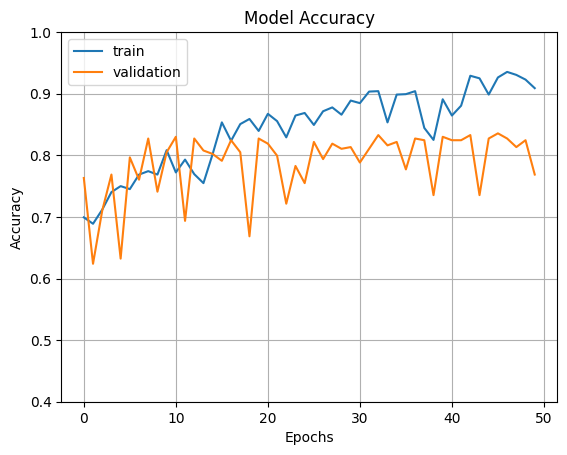

In [16]:
# Evaluating the model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

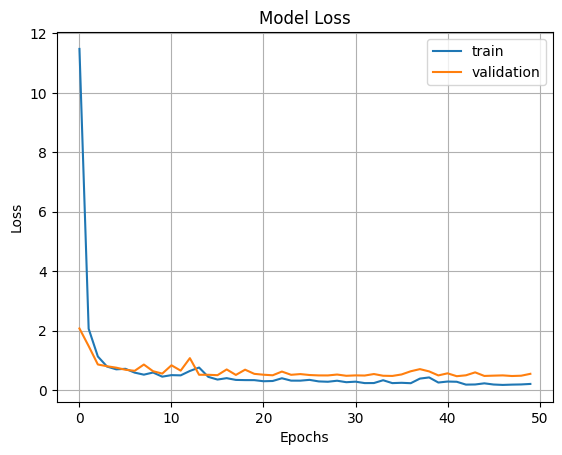

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [18]:
# Generate predictions for the validation dataset
val_predictions = model.predict(val_ds)

# Convert predictions to class labels
val_pred_labels = np.argmax(val_predictions, axis=1)

# Get true labels for the validation dataset
val_true_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_true_labels = np.argmax(val_true_labels, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)

6/6 [==============================] - 7s 144ms/step


In [19]:
# Print the confusion matrix for the best_validation_accuracy (best_accuracy1)
print("Confusion Matrix (Best Validation Accuracy - best_accuracy1):")
print(conf_matrix)

Confusion Matrix (Best Validation Accuracy - best_accuracy1):
[[ 20  42]
 [ 69 228]]


In [20]:
class_names1 = ['Kidney_stone','Normal']

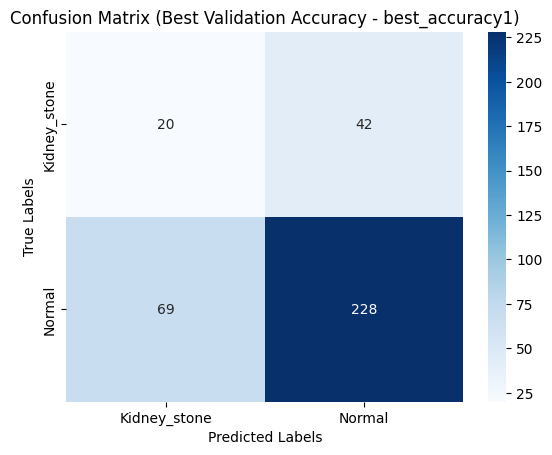

In [21]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names1, yticklabels=class_names1)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Best Validation Accuracy - best_accuracy1)')
plt.show()